# **THE SPARKS FOUNDATION**

#### DATA SCIENCE AND BUSINESS ANALYTICS

#### GRIP OCTOBER 2022

#### TASK #01: PREDICTION USING SUPERVISED MACHINE LEARNING

#### DESCRIPTION: PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NUMBER OF STUDY HOURS. 

#### EXECUTED BY : SAIRUSHI NANASAHEB GADAKH

In [1]:
# Importing Libraries for the case study
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
os.chdir("C:/Users/DELL/Documents/SAIRUSHI/PYTHON")          # changing  the directory of study 


In [3]:
# Importing dataset
df=pd.read_csv("no._of study hours.txt")

In [4]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
 df.isnull().sum()
# Here we can see there is no missing value to be replaced for the case study

Hours     0
Scores    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()             # Here we can see the summary of the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
print("Here you can see , There is high correlation between No. of hours and Scores.")

Here you can see , There is high correlation between No. of hours and Scores.


In [10]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
df.shape

(25, 2)

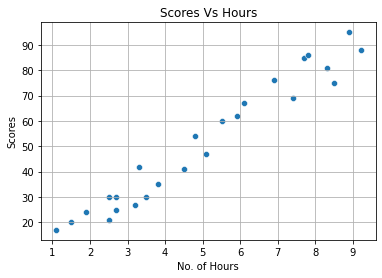

In [12]:
# Visualizing the data
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title('Scores Vs Hours')
plt.xlabel('No. of Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

###### Here we can see that there is positive linera relation between the variables, which states that as the number of hours studing increases the percentage scored also increases.

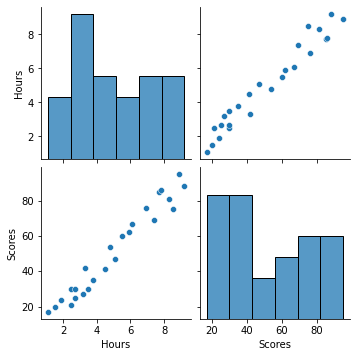

In [13]:
sns.pairplot(df)

## Now we need to prepare the data for the further prediction.

In [14]:
# Firstly we need to define the dependent and independent variables from the dataset
# we will divide the data into attributes(inputs) and labels(outputs)

x=df.iloc[:,:1].values             #  DEPENDENT VARIABLE : will give the no. of hours studied
y=df.iloc[:,1:2].values            #  RESPONSE VARIABLE : gives the scored percentages

In [15]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [17]:
# split the data for training and testing categories
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)        
# here we have split the data into train and test ( 8:2 ratio)

In [18]:
# Importing Linear regression model from sklearn Library and fitting the training data
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(xtrain,ytrain)

LinearRegression()

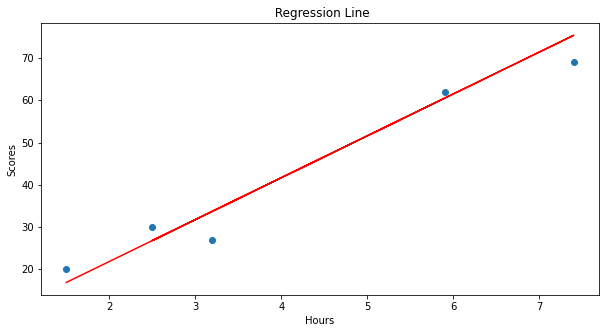

In [19]:
# Plotting the regression line
RegressionLine = model_lr.coef_*xtest+model_lr.intercept_

# Plotting for the test data
plt.figure(figsize=[10,5])

plt.scatter(xtest, ytest)
plt.plot(xtest, RegressionLine,color = 'red')
plt.title(' Regression Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### We have plotted the regrssion line.


In [20]:
# Predicting the Scores according to number of hours studied
y_pred = model_lr.predict(xtest)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,ytest)
score

0.9546785947197246

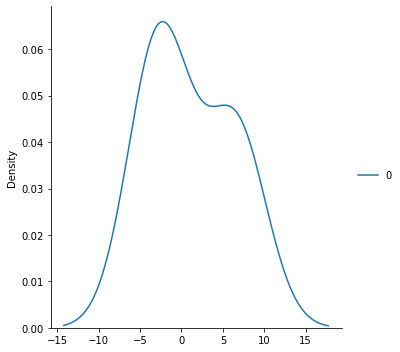

In [22]:
sns.displot(y_pred-ytest,kind='kde')

### We have trained our algorithm so now we can do prediction. 

In [23]:
d1=pd.DataFrame(np.c_[xtest,ytest,y_pred],columns=["Hours","Actual Score","Predicted Score"])
d1


,Hours,Actual Score,Predicted Score
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


In [24]:
# You can also test with our own data
hours = 9.25
prediction = model_lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [25]:
 from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


## **CONCLUSION:**

If the student studies for 9.25 hours per day,then the scored percentage may be  **93.69173249**